In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from run import run_backtest
from qamsi.cov_estimators.cov_estimators import CovEstimators

ESTIMATOR = CovEstimators.HISTORICAL
VERBOSE = True
PLOT_PROGRESS = False

Train data on 2004-03-23 00:00:00 to 2022-03-31 00:00:00
Test data on 2022-04-01 00:00:00 to 2024-12-31 00:00:00
Num Train Iterations: 4539
Running backtest...


4287it [01:28, 48.36it/s]


Running backtest...


4287it [00:02, 2080.81it/s]


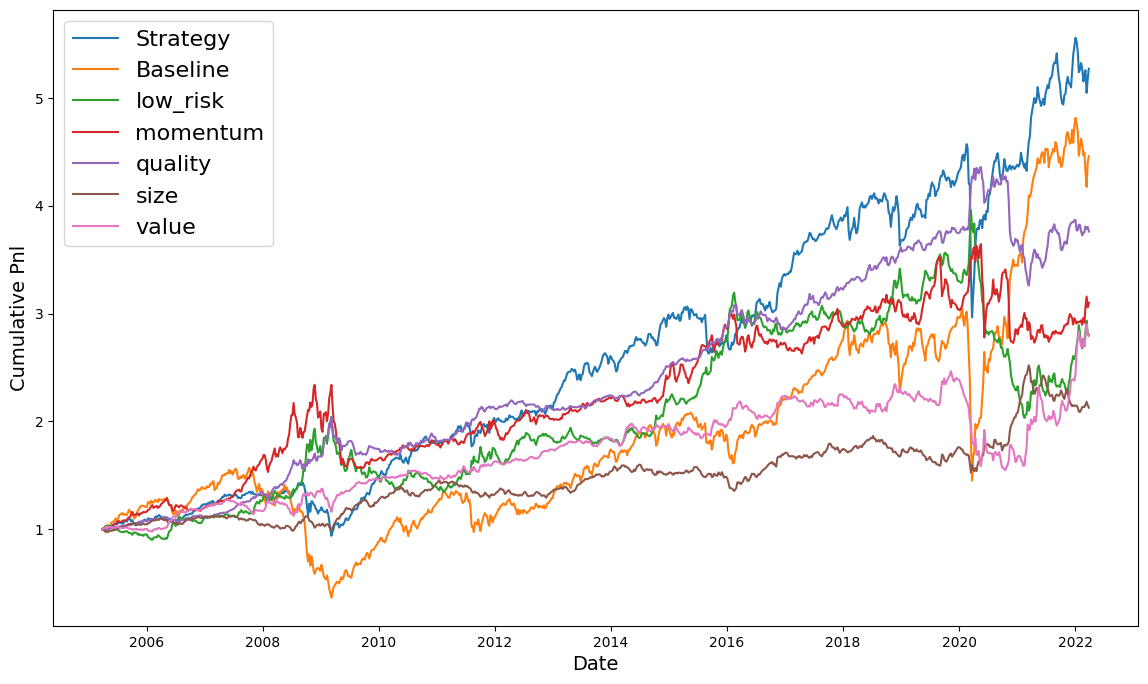

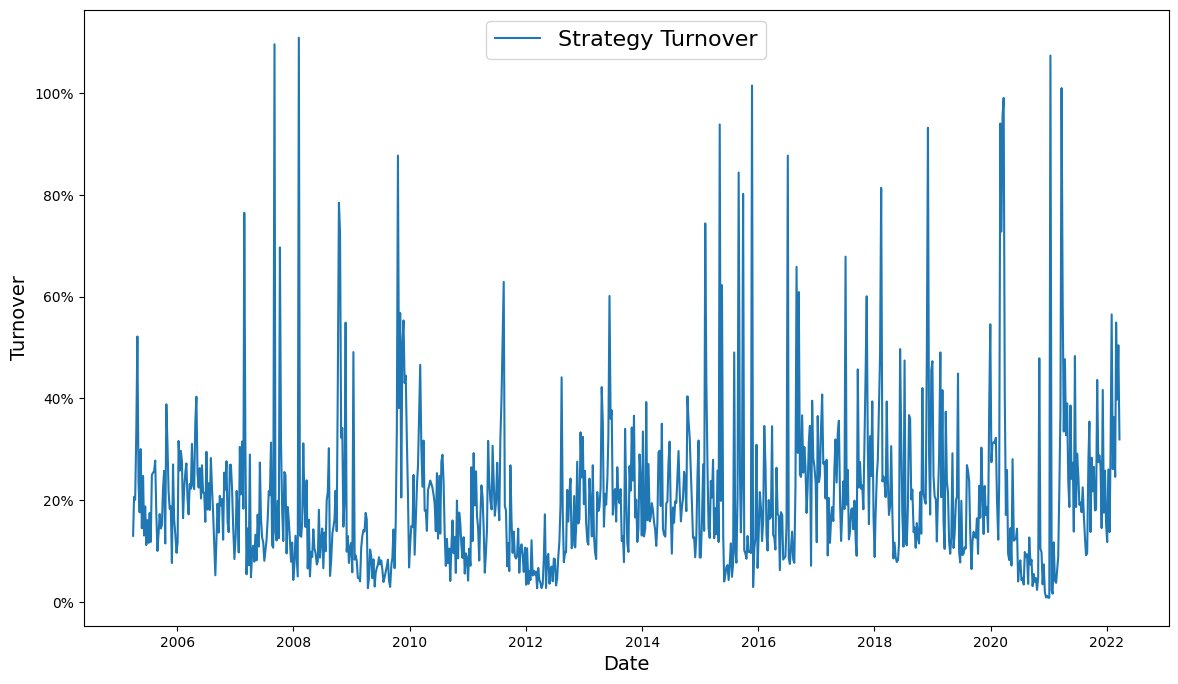

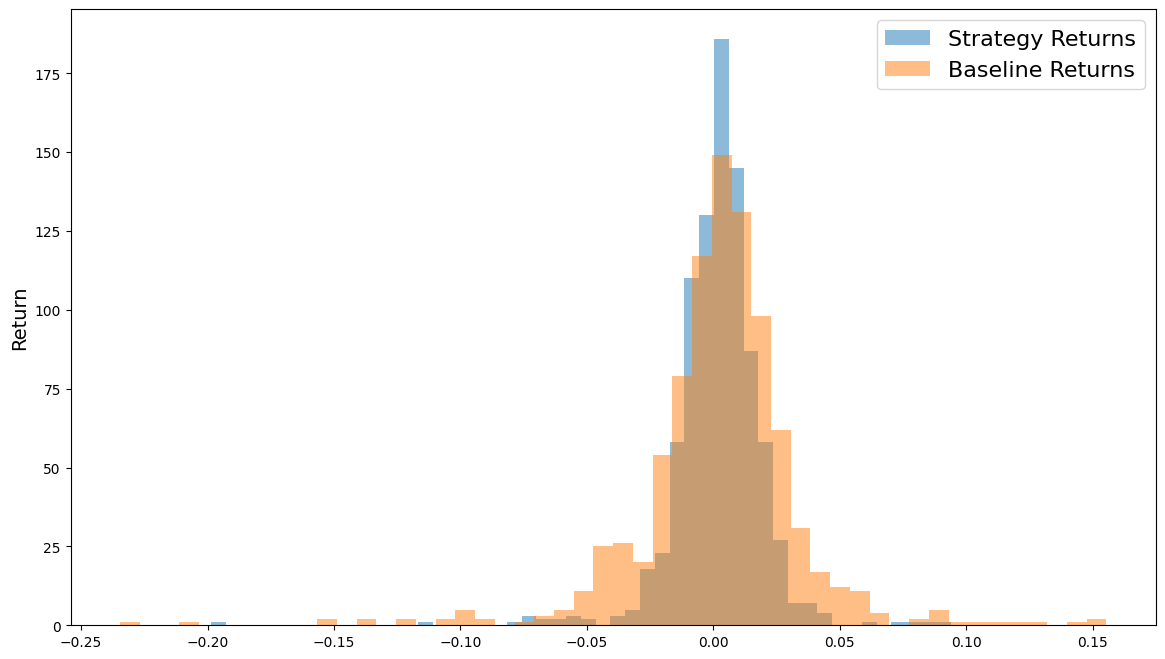

In [34]:
run_result = run_backtest(
    ESTIMATOR.value(), verbose=VERBOSE, plot_progress=PLOT_PROGRESS
)

In [35]:
run_result.strategy

StrategyStatistics:
* final_nav = 5.277433
* final_rf = 1.953857
* mean = 0.118954
* std = 0.138674
* skew = -2.108336
* kurtosis = 22.922751
* max_dd = -0.267370
* sharpe = 0.523943
* alpha_buy_hold = 0.086797
* tracking_error_buy_hold = 0.157921
* ir_buy_hold = 0.549621
* factor_loadings = {'low_risk': -0.5132881055345595, 'momentum': 0.14290692531749724, 'quality': -0.043795456111296226, 'size': -0.2927502669286245, 'value': 0.3214256977074794}
* alpha_benchmark = 0.081262
* alpha_benchmark_pvalue = 0.012854
* tracking_error_benchmark = 0.127573
* ir_benchmark = 0.636985
* ttest_pval = 0.009382
* levene_pval = 0.000000
* timing_ability_coef = -0.398784
* timing_ability_pval = 0.114852

In [36]:
run_result.baseline

StrategyStatistics:
* final_nav = 4.415201
* final_rf = 1.953857
* mean = 0.105548
* std = 0.250062
* skew = -0.945951
* kurtosis = 9.179392
* max_dd = -0.329953
* sharpe = 0.236948
* alpha_buy_hold = 0.073391
* tracking_error_buy_hold = 0.281457
* ir_buy_hold = 0.260754
* factor_loadings = {'low_risk': -1.7137650817437151, 'momentum': 0.20160439414971318, 'quality': 0.0033783564411173916, 'size': -0.5618506896658287, 'value': 0.9746407693042926}
* alpha_benchmark = 0.106655
* alpha_benchmark_pvalue = 0.003820
* tracking_error_benchmark = 0.147883
* ir_benchmark = 0.721215
* ttest_pval = 0.066140
* levene_pval = 0.000000
* timing_ability_coef = 0.409151
* timing_ability_pval = 0.274256